# Coding Assignment 4

**Semantic Segmentation**<br/>
##### Problem Statement
a)Understand the PASCAL VOC dataset http://host.robots.ox.ac.uk/pascal/VOC/voc2012/index.html#data<br/>
b)Understand the definition of semantic segmentation<br/>
c)Download few images and understand the annotation format<br/>
d)Randomly select a few images and plot the annotations<br/>
e)How will you define IOU for a segmentation task? How mid it different from the IOU for an object detection task?<br/>


##### Solution
a) **Understanding the PASCAL VOC Dataset**:
   The PASCAL VOC (Visual Object Classes) dataset is a widely used benchmark dataset for object recognition, segmentation, and classification tasks in computer vision. It consists of a collection of images labeled with object categories and segmentation masks. The dataset is divided into training and validation sets, with annotations provided in XML format.

b) **Definition of Semantic Segmentation**:
   Semantic segmentation is a computer vision task that involves classifying each pixel in an image into a predefined category or class. Unlike object detection, which identifies objects and their bounding boxes, semantic segmentation assigns a label to every pixel, effectively segmenting the image into regions corresponding to different objects or parts of objects. The output is a dense pixel-wise classification of the image.

c) **Understanding Annotation Format**:
   The annotation format for semantic segmentation typically involves labeling each pixel in an image with a corresponding class identifier. In the PASCAL VOC dataset, annotations are provided in XML format. Each XML file corresponds to an image and contains information about object classes, bounding box coordinates, and segmentation masks.

d) **Randomly Selecting Images and Plotting Annotations**:
   To randomly select and plot annotations for images, you can use Python libraries such as `os`, `xml.etree.ElementTree`, `matplotlib`, and `PIL` (Pillow). Here's a general outline of how you can do this:
   - Load the dataset and annotations.
   - Randomly select a few images.
   - Parse the XML annotations to extract segmentation masks.
   - Plot the images with annotations using Matplotlib.

e) **Defining IOU for Segmentation Task and its Difference from Object Detection IOU**:
   IOU (Intersection over Union) for a segmentation task is defined as the ratio of the area of overlap between the predicted segmentation mask and the ground truth mask to the area of union between them. It measures the spatial overlap between two masks, indicating how well the predicted mask aligns with the ground truth mask at the pixel level.

   The key difference between IOU for segmentation and object detection tasks lies in what they measure:
   - For segmentation tasks, IOU measures pixel-wise overlap between masks, focusing on the spatial alignment of predicted and ground truth masks.
   - For object detection tasks, IOU (often referred to as Intersection over Minimum Area) measures the overlap between bounding boxes of detected objects and ground truth boxes, focusing on how well the bounding boxes align rather than pixel-level alignment.



#### Solution Summary
1. **Loading the True Segmentation Mask:**
    - `load_segmentation_mask(segmentation_class_dir, image_id)`: This function loads the ground truth segmentation mask from the specified directory.

2. **Simulating Predicted Masks:**
    - `simulate_predicted_masks(segmentation_mask)`: This function creates a simulated predicted mask based on the true segmentation mask. It introduces some randomness to simulate prediction errors.

3. **Calculating IoU:**
    - `calculate_iou(mask1, mask2)`: This function computes the Intersection over Union (IoU) score between the true and predicted masks. The IoU is a measure of the overlap between two masks.

4. **Visualizing the Segmentation:**
    - `visualize_segmentation(image_path, annotation_path, segmentation_class_dir)`: This function performs the following tasks:
        - Loads and displays the original image with annotated bounding boxes.
        - Loads the true segmentation mask.
        - Generates a simulated predicted mask.
        - Computes and displays the IoU score.
        - Plots the original image with bounding boxes, the true mask, the predicted mask, and the IoU score side-by-side for easy comparison.

5. **Main Function:**
    - The `main()` function sets up the directory paths and specifies the image ID to visualize. It calls `visualize_segmentation()` with these parameters to display the results.


### 1. Import the necessary libraries

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import random
import xml.etree.ElementTree as ET

### 2. Define functions for loading segmentation masks

In [8]:
def load_segmentation_mask(segmentation_class_dir, image_id):
    mask_path = os.path.join(segmentation_class_dir, f"{image_id}.png")
    if os.path.exists(mask_path):
        mask = Image.open(mask_path).convert("L")
        return np.array(mask)
    else:
        raise FileNotFoundError(f"Segmentation mask for {image_id} not found in {segmentation_class_dir}")

### 3. Define functions for simulating predicted masks

In [9]:
def simulate_predicted_masks(segmentation_mask):
    predicted_mask = np.zeros_like(segmentation_mask)
    height, width = segmentation_mask.shape
    for y in range(height):
        for x in range(width):
            if segmentation_mask[y, x] != 0 and random.random() > 0.1:
                predicted_mask[y, x] = segmentation_mask[y, x]
            elif segmentation_mask[y, x] == 0 and random.random() < 0.05:
                predicted_mask[y, x] = 1
    return predicted_mask

### 4. Define functions for calculating IOU

In [10]:
def calculate_iou(mask1, mask2):
    intersection = np.logical_and(mask1, mask2)
    union = np.logical_or(mask1, mask2)
    iou = np.sum(intersection) / np.sum(union) if np.sum(union) != 0 else 0
    return iou

### 5. Define a function to visualize images, segmentation masks, and IOU

In [11]:
def visualize_segmentation(image_path, annotation_path, segmentation_class_dir):
    image = Image.open(image_path).convert("RGB")
    image_id = os.path.splitext(os.path.basename(image_path))[0]
    
    annotation_path = os.path.join(annotation_path, f"{image_id}.xml")
    tree = ET.parse(annotation_path)
    root = tree.getroot()
    
    try:
        segmentation_mask = load_segmentation_mask(segmentation_class_dir, image_id)
    except FileNotFoundError as e:
        print(e)
        return
    
    predicted_mask = simulate_predicted_masks(segmentation_mask)
    iou = calculate_iou(segmentation_mask, predicted_mask)
    
    draw = ImageDraw.Draw(image)
    for obj in root.findall('object'):
        bndbox = obj.find('bndbox')
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)
        class_name = obj.find('name').text
        draw.rectangle([xmin, ymin, xmax, ymax], outline="red", width=3)
        draw.text((xmin, ymin), class_name, fill="red")
    
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.title("Original Image with Bounding Boxes")
    plt.axis('off')
    
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(segmentation_mask)
    plt.title(f"True Mask: {image_id}")
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(predicted_mask)
    plt.title(f"Predicted Mask: {image_id}")
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.text(0.5, 0.5, f"IoU: {iou:.2f}", fontsize=15, ha='center', va='center')
    plt.title("IoU")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show() 

### 6. Start the exection

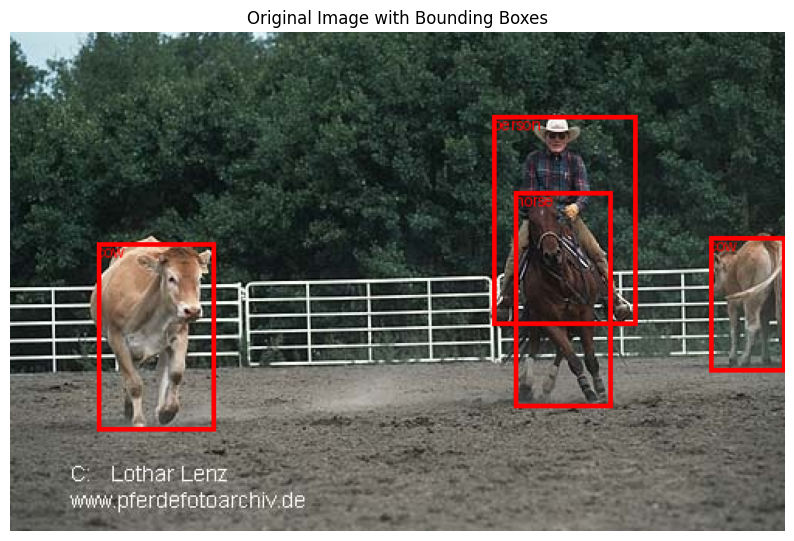

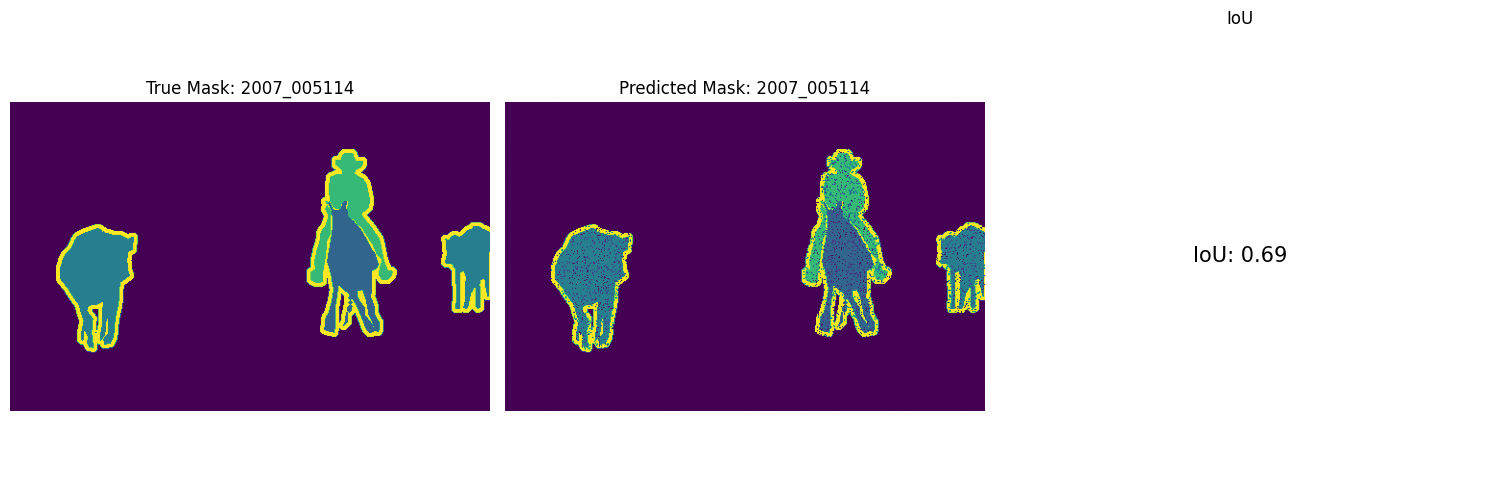

In [12]:
data_dir = r"C:\Users\jalee\OneDrive\Desktop\ML\VOCtrainval_11-May-2012\VOCdevkit\VOC2012"
images_dir = os.path.join(data_dir, "JPEGImages")
annotations_dir = os.path.join(data_dir, "Annotations")
segmentation_class_dir = os.path.join(data_dir, "SegmentationClass")
    
image_id = "2007_005114"  # Change this to the desired image ID
    
image_path = os.path.join(images_dir, f"{image_id}.jpg")
visualize_segmentation(image_path, annotations_dir, segmentation_class_dir)   